**Coretan Python Final DAC IFEST 2020**

Tim High Hopes (Politeknik Keuangan Negara STAN)

*   George Budi Eka Dharma, D3 Pajak 2017
*   Natasya Gloria Rajagukguk, D3 Pajak 2017
*   Jessica Xaviera, D3 Pajak 2017






Masalah yang harus dipecahkan oleh tim

> Melakukan pengelompokan jenis customer pada DQLab Store dan memberikan perlakuan atau rekomendasi yang sesuai pada kelompok tersebut



Beberapa hal yang perlu diketahui:

*   Dalam menghadapi final kami menggunakan Python, MySQL, dan Microsoft Excel, dengan penggunaan SQL secara dominan (~70%)
*   Kertas kerja ini hanya berperan sebagai kertas coretan dalam membuat analisis dengan produk akhir berupa file presentasi (.ppt/.pdf)
*   Kami menggunakan metode Exploratory Data Analysis (EDA) secara umum
*   Kami tidak menggunakan metode clustering seperti kelompok lainnya dikarenakan menurut kelompok kami, dataset yang diberikan tidak memberikan feature yang cukup muktahir untuk dilakukan proses tersebut
*   Selain itu, dari penggunaan EDA, diketahui bahwa kelompok customer kurang begitu beragam

Babak final hari pertama dilakukan selama 4 (empat) jam termasuk pengumpulan hasil presentasi yang akan dipresentasikan pada babak final hari kedua



Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import numpy as np

Performa DQLab Store


> Kami menarik informasi performa DQLab selama dua tahun beroperasi dengan mencari:
*   Pendapatan kotor yang terjadi di DQLab Store
*   Diskon yang DQLab Store/Seller berikan
*   Pendapatan bersih yang diterima oleh Seller
*   Jumlah order yang terjadi di DQLab Store
*   Jumlah customer DQLab Store


In [ ]:
ord = pd.read_csv('orders.csv', sep=';')
display(ord.head())
print('jumlah subtotal:\n', ord['subtotal'].sum())
print('jumlah discount:\n', ord['discount'].sum())
print('jumlah total:\n', ord['total'].sum())
print('jumlah order:\n', ord['order_id'].nunique())
print('jumlah customer:\n', ord['buyer_id'].nunique())

,order_id,seller_id,buyer_id,kodepos,subtotal,discount,total,created_at,paid_at,delivery_at
0,3,5,4769,32610,900000,0,900000,2019-06-01,2019-06-04,2019-06-12
1,5,23,4276,2674,220000,0,220000,2019-04-02,2019-04-05,2019-04-09
2,8,4,14110,48577,1248000,0,1248000,2019-08-02,2019-08-13,2019-08-20
3,19,5,3831,91235,1074000,0,1074000,2020-05-16,NaN,NaN
4,31,46,5318,96740,253000,0,253000,2019-03-12,2019-03-17,2019-03-20


jumlah subtotal:
 150212823000
jumlah discount:
 1213710550
jumlah total:
 148863229450
jumlah order:
 74874
jumlah customer:
 17877


Kontribusi jenis produk ke penjualan

> Kami mencari jenis produk apa yang memberikan sales tertinggi (sebelum diskon)



,order_detail_id,order_id,product_id,price,quantity
0,5,3,907,25000,36
1,9,5,562,10000,22
2,15,8,645,39000,32
3,48,19,287,22000,12
4,49,19,201,26000,27


,order_detail_id,order_id,product_id,price,quantity,subtotal_odt,desc_product,category,base_price
0,5,3,907,25000,36,900000,Citra Fresh Glow Multifunction Gel Coconut Nou...,Kebersihan Diri,25000
1,34433,9578,907,25000,24,600000,Citra Fresh Glow Multifunction Gel Coconut Nou...,Kebersihan Diri,25000
2,79700,22162,907,25000,37,925000,Citra Fresh Glow Multifunction Gel Coconut Nou...,Kebersihan Diri,25000
3,83128,23136,907,25000,23,575000,Citra Fresh Glow Multifunction Gel Coconut Nou...,Kebersihan Diri,25000
4,83129,23136,907,25000,23,575000,Citra Fresh Glow Multifunction Gel Coconut Nou...,Kebersihan Diri,25000


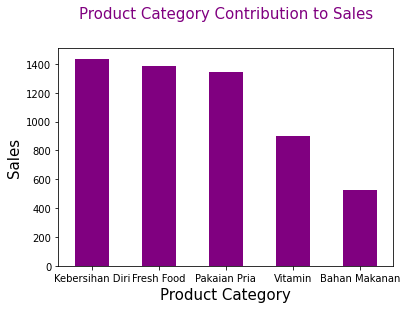

In [ ]:
odt = pd.read_csv('order_details.csv', sep=';')
display(odt.head())
odt['subtotal_odt'] = odt['price']*odt['quantity']
odt_pro = pd.merge(left=odt, right=pro, how='inner', left_on='product_id', right_on='product_id')
display(odt_pro.head())
#bar plot
plt.clf()
odt_pro.groupby('category')['subtotal_odt'].nunique().sort_values(ascending=False).head(5).plot(kind='bar', color='purple')
plt.title('Product Category Contribution to Sales',loc='center',pad=30, fontsize=15, color='purple')
plt.xlabel('Product Category', fontsize = 15)
plt.ylabel('Sales',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.savefig('category to sales.png') 
plt.show()

Kategori produk

> Kami mencari jumlah kategori produk



In [ ]:
pro = pd.read_csv('products.csv', sep=';')
display(pro.head())
print('Kategori produk:\n', pro['category'].nunique())

,product_id,desc_product,category,base_price
0,1,OLIVIA KULOT OLV03,Pakaian Wanita,110000
1,2,BLANIK BLOUSE BL304,Pakaian Wanita,100000
2,3,NEW DAY BY RIX DRESS ND01,Pakaian Wanita,85000
3,4,BLANIK BLOUSE BL023,Pakaian Wanita,85000
4,5,BLANIK BLAZER BL031,Pakaian Wanita,99000


Kategori produk:
 12


Frekuensi pembelian per customer

> Kami mencari tahu seberapa sering customer melakukan pembelian di DQLab Store.Dsini kami juga mencari tahu seberapa besar orang yang hanya melakukan pembelian sebanyak 1 (satu) kali atau *one-time buyer* yang dapat memberikan temuan akan masalah yang mungkin terjadi pada DQLab Store



In [ ]:
onetime = ord.copy()
onetime['count'] = ord.groupby('buyer_id')['order_id'].count()
print(onetime.head())
print(onetime.loc[(onetime['count'] == 1)])
print(onetime.loc[(onetime['count'] > 1) & (onetime['count'] <= 5)])
print(onetime.loc[(onetime['count'] > 5) & (onetime['count'] <= 10)])

   order_id  seller_id  buyer_id  ...     paid_at  delivery_at  count
0         3          5      4769  ...  2019-06-04   2019-06-12    NaN
1         5         23      4276  ...  2019-04-05   2019-04-09    6.0
2         8          4     14110  ...  2019-08-13   2019-08-20    2.0
3        19          5      3831  ...         NaN          NaN    6.0
4        31         46      5318  ...  2019-03-17   2019-03-20    2.0

[5 rows x 11 columns]
       order_id  seller_id  buyer_id  ...     paid_at  delivery_at  count
15          104          8      8799  ...  2020-02-09   2020-02-13    1.0
21          135         51      2716  ...  2019-11-19          NaN    1.0
53          350         14      3382  ...         NaN          NaN    1.0
58          369         44      8260  ...  2020-06-09   2020-06-11    1.0
68          431         27     17466  ...  2019-12-12   2019-12-17    1.0
...         ...        ...       ...  ...         ...          ...    ...
17799    118626         59     11683  .

Masalah yang muncul:

*   Jumlah pembeli yang berkategori high value sangatlah sedikit (<1%) dibandingkan pembeli low value
*   Jumlah revenue yang dihasilkan dikuasai oleh pembeli low value (>99%)
*   Frekuensi pembelian masih didominasi sebanyak 2-5 kali
*   Transaksi gagal berpotensi menyumbang 13% total pendapatan dan dilakukan oleh 0.84% customer
*   Proses bisnis berpotensi tidak menguntungkan dengan terlalu lamanya jangka waktu melakukan pembayaran dan pengiriman






Rekomendasi:
High value customer
*   Memberikan penghargaan dapat berupa diskon loyalitas/member
*   Memberikan layanan CS terbaik dan melakukan survei terhadap customer tersebut

Low value customer
*   Melakukan strategi retargeting terhadap customer yang sudah pernah melakukan pembelian
*   Berinovasi dengan event-event


